## Project 2 - Continuous Control 

In [1]:
#Imports
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
from datetime import datetime as dt
import matplotlib.pyplot as plt
from ddpg_agent import Agent
%matplotlib inline

In [2]:
#Loading environment
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
#Reading
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = env_info.vector_observations.shape[1]

In [4]:
#Init Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [5]:
#DDPG from ddpg-pendulum
def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    target_score = 30     #Desired score
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        #resetting with train_mode true
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        #agent.reset()
        score = 0
        for t in range(max_t):
            agent.reset()
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), f'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), f'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))        
            
    return scores

In [6]:
#Training
scores = ddpg()

Episode 100	Average Score: 3.57
Episode 200	Average Score: 33.68
Episode 300	Average Score: 36.91
Episode 400	Average Score: 37.08
Episode 500	Average Score: 37.10
Episode 600	Average Score: 36.53
Episode 700	Average Score: 37.17
Episode 800	Average Score: 36.45
Episode 900	Average Score: 37.22
Episode 1000	Average Score: 37.01


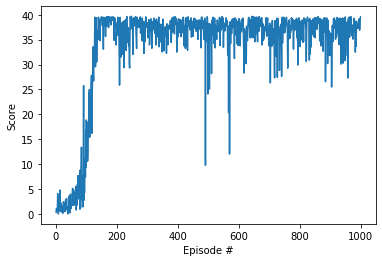

In [7]:
#Plotting the score vs count of episodes.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
#close
env.close()


In [9]:
scores

[0.3199999928474426,
 1.0899999756366014,
 0.4999999888241291,
 0.9299999792128801,
 0.7199999839067459,
 4.089999908581376,
 1.4499999675899744,
 0.0,
 0.25999999418854713,
 0.9699999783188105,
 1.269999971613288,
 1.389999968931079,
 4.789999892935157,
 1.1599999740719795,
 0.549999987706542,
 2.2099999506026506,
 0.549999987706542,
 1.149999974295497,
 1.579999964684248,
 0.6799999848008156,
 0.2799999937415123,
 0.9299999792128801,
 0.13999999687075615,
 1.9799999557435513,
 2.4499999452382326,
 2.029999954625964,
 0.42999999038875103,
 0.789999982342124,
 0.6499999854713678,
 2.2199999503791332,
 0.5399999879300594,
 2.8599999360740185,
 1.81999995931983,
 1.389999968931079,
 3.0999999307096004,
 1.4499999675899744,
 0.8499999810010195,
 1.4499999675899744,
 0.2199999950826168,
 0.0,
 0.5799999870359898,
 1.1999999731779099,
 3.589999919757247,
 2.5899999421089888,
 1.9199999570846558,
 0.2299999948590994,
 2.989999933168292,
 3.9899999108165503,
 1.9299999568611383,
 1.0899999756